In [233]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from tqdm import tqdm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier

In [2]:
df1=pd.read_csv('C:/Users/shaha/Desktop/Springboard/Unit26/Take home 2/relax_challenge/users_engagement.csv')
df2=pd.read_csv('C:/Users/shaha/Desktop/Springboard/Unit26/Take home 2/relax_challenge/users.csv')

In [3]:
df1.head()

,time_stamp,user_id,visited
0,2014-04-22 3:53:30,1,1
1,2013-11-15 3:45:04,2,1
2,2013-11-29 3:45:04,2,1
3,2013-12-09 3:45:04,2,1
4,2013-12-25 3:45:04,2,1


In [4]:
df1.shape

(207917, 3)

In [5]:
df1=df1.sort_values(by=['user_id','time_stamp'])
df1['time_stamp']=pd.to_datetime(df1['time_stamp'])

In [6]:
df1=df1.set_index(pd.DatetimeIndex(df1['time_stamp']))
df1.head()

,time_stamp,user_id,visited
time_stamp,,,
2014-04-22 03:53:30,2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2013-12-25 03:45:04,2,1


In [12]:
df_group=df1.groupby('user_id').resample('W').sum()
df_group=df_group.drop('user_id',axis=1)
df_group.head()

visited
user_id time_stamp         
1       2014-04-27        1
2       2013-11-17        1
        2013-11-24        0
        2013-12-01        1
        2013-12-08        0

In [24]:
df_user=df_group[df_group['visited']>=3]
print(df_user.head())
df_user.shape

                    visited
user_id time_stamp         
2       2014-02-09        3
10      2013-03-03        3
        2013-04-14        3
        2013-04-28        3
        2013-05-05        4


(33859, 1)

In [50]:
l=[]
for i in tqdm(range(33859)):
    l.append(index_user[i][0])

100%|██████████| 33859/33859 [00:01<00:00, 18306.95it/s]


In [51]:
adopted_users=np.unique(l)
adopted_users=adopted_users.tolist()
len(adopted_users)

1445

In [149]:
df2=pd.read_csv('C:/Users/shaha/Desktop/Springboard/Unit26/Take home 2/relax_challenge/users.csv')

In [150]:
df2.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 3:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 3:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 8:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [151]:
df2['Adopted_user']=0
df2.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Adopted_user
0,1,2014-04-22 3:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 3:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 8:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


### Data Cleaning

In [152]:
def modification(table):
    for i in adopted_users:
        for j in range(12000):
            if i==j+1:
                table.iloc[j,10]=1
                break
modification(df2)

In [153]:
df2.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Adopted_user
0,1,2014-04-22 3:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 3:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 8:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


In [154]:
df2.shape

(12000, 11)

In [155]:
df2.dtypes

object_id                       int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
Adopted_user                    int64
dtype: object

In [156]:
df2=df2.drop(['name','email'],axis=1)
df2['last_session_creation_time']=df2['last_session_creation_time']/10**9
df2.rename(columns={'last_session_creation_time': 'last_session_creation_timex10^9'}, inplace=True)
df2.head()

,object_id,creation_time,creation_source,last_session_creation_timex10^9,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Adopted_user
0,1,2014-04-22 3:53:30,GUEST_INVITE,1.398139,1,0,11,10803.0,0
1,2,2013-11-15 3:45:04,ORG_INVITE,1.396238,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,ORG_INVITE,1.363735,0,0,94,1525.0,0
3,4,2013-05-21 8:09:28,GUEST_INVITE,1.369210,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,GUEST_INVITE,1.358850,0,0,193,5240.0,0


In [157]:
df2['creation_time']=pd.to_datetime(df2['creation_time'])

In [158]:
df2['year']=1
df2['month']=1
df2['day']=1
for i in tqdm(range(12000)):
    df2.iloc[i,9]=df2.iloc[i,1].year
for i in tqdm(range(12000)):
    df2.iloc[i,10]=df2.iloc[i,1].month
for i in tqdm(range(12000)):
    df2.iloc[i,11]=df2.iloc[i,1].day

100%|██████████| 12000/12000 [00:08<00:00, 1448.17it/s]


In [159]:
df2=df2.drop('creation_time', axis=1)
df2.head()

,object_id,creation_source,last_session_creation_timex10^9,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Adopted_user,year,month,day
0,1,GUEST_INVITE,1.398139,1,0,11,10803.0,0,2014,4,22
1,2,ORG_INVITE,1.396238,0,0,1,316.0,1,2013,11,15
2,3,ORG_INVITE,1.363735,0,0,94,1525.0,0,2013,3,19
3,4,GUEST_INVITE,1.369210,0,0,1,5151.0,0,2013,5,21
4,5,GUEST_INVITE,1.358850,0,0,193,5240.0,0,2013,1,17


In [160]:
df2.shape

(12000, 11)

In [161]:
df2.isnull().sum().sort_values()

object_id                             0
creation_source                       0
opted_in_to_mailing_list              0
enabled_for_marketing_drip            0
org_id                                0
Adopted_user                          0
year                                  0
month                                 0
day                                   0
last_session_creation_timex10^9    3177
invited_by_user_id                 5583
dtype: int64

In [169]:
df2['last_session_creation_timex10^9'].fillna(df2['last_session_creation_timex10^9'].mean(), inplace=True)
df2.isnull().sum().sort_values()

object_id                             0
creation_source                       0
last_session_creation_timex10^9       0
opted_in_to_mailing_list              0
enabled_for_marketing_drip            0
org_id                                0
Adopted_user                          0
year                                  0
month                                 0
day                                   0
invited_by_user_id                 5583
dtype: int64

In [178]:
df2['invited_by_user_id'].fillna(0, inplace=True)
df2.isnull().sum().sort_values()

object_id                          0
creation_source                    0
last_session_creation_timex10^9    0
opted_in_to_mailing_list           0
enabled_for_marketing_drip         0
org_id                             0
invited_by_user_id                 0
Adopted_user                       0
year                               0
month                              0
day                                0
dtype: int64

### EDA

In [179]:
df2.head()

,object_id,creation_source,last_session_creation_timex10^9,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Adopted_user,year,month,day
0,1,GUEST_INVITE,1.398139,1,0,11,10803.0,0,2014,4,22
1,2,ORG_INVITE,1.396238,0,0,1,316.0,1,2013,11,15
2,3,ORG_INVITE,1.363735,0,0,94,1525.0,0,2013,3,19
3,4,GUEST_INVITE,1.369210,0,0,1,5151.0,0,2013,5,21
4,5,GUEST_INVITE,1.358850,0,0,193,5240.0,0,2013,1,17


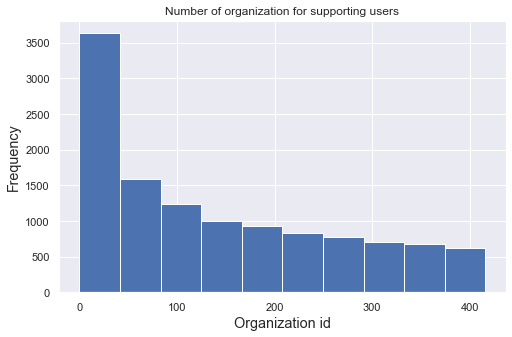

In [191]:
sns.set()
plt.figure(figsize=(8,5))
plt.hist(df2['org_id'])
plt.title('Number of organization for supporting users')
plt.xlabel('Organization id', size='large')
plt.ylabel('Frequency', size='large')
plt.show()

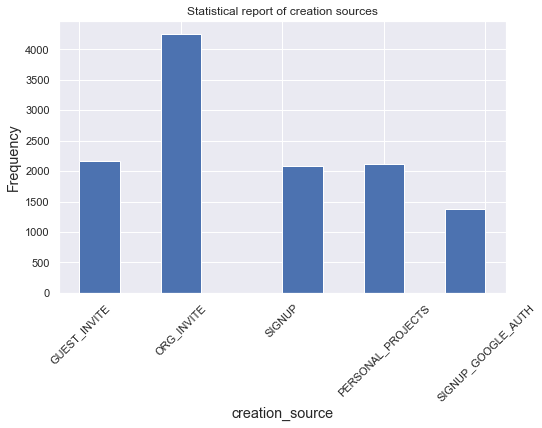

In [192]:
plt.figure(figsize=(8,5))
plt.hist(df2['creation_source'])
plt.title('Statistical report of creation sources')
plt.xlabel('creation_source', size='large')
plt.ylabel('Frequency', size='large')
plt.xticks(rotation=45)
plt.show()

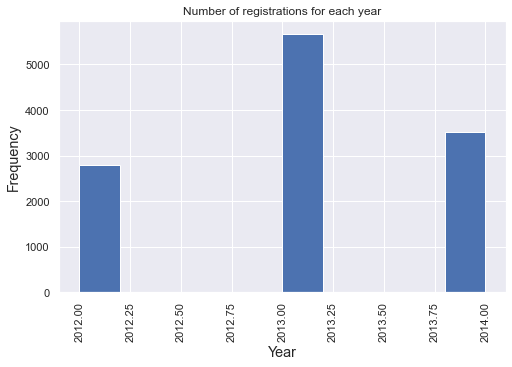

In [193]:
plt.figure(figsize=(8,5))
plt.hist(df2['year'])
plt.title('Number of registrations for each year')
plt.xlabel('Year', size='large')
plt.ylabel('Frequency', size='large')
plt.xticks(rotation=90)
plt.show()

### Modelling

In [194]:
df2['creation_source'].unique()

array(['GUEST_INVITE', 'ORG_INVITE', 'SIGNUP', 'PERSONAL_PROJECTS',
       'SIGNUP_GOOGLE_AUTH'], dtype=object)

In [195]:
#Generation of dumm variables
df2=pd.get_dummies(df2, columns=['creation_source'], prefix='C')

In [196]:
df2.head()

,object_id,last_session_creation_timex10^9,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Adopted_user,year,month,day,C_GUEST_INVITE,C_ORG_INVITE,C_PERSONAL_PROJECTS,C_SIGNUP,C_SIGNUP_GOOGLE_AUTH
0,1,1.398139,1,0,11,10803.0,0,2014,4,22,1,0,0,0,0
1,2,1.396238,0,0,1,316.0,1,2013,11,15,0,1,0,0,0
2,3,1.363735,0,0,94,1525.0,0,2013,3,19,0,1,0,0,0
3,4,1.369210,0,0,1,5151.0,0,2013,5,21,1,0,0,0,0
4,5,1.358850,0,0,193,5240.0,0,2013,1,17,1,0,0,0,0


In [199]:
df2.shape

(12000, 15)

In [225]:
#Genration of X_train,y_train,X_pred and y_pred from dataset
X=df2[df2['object_id']<11500].drop('Adopted_user', axis=1).values
y=df2[df2['object_id']<11500]['Adopted_user'].values
X_ML=df2[df2['object_id']>=11500].drop('Adopted_user', axis=1).values
y_ML=df2[df2['object_id']>=11500]['Adopted_user'].values
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)

In [226]:
#Regression model
reg_model=LinearRegression()
reg_model.fit(X_train,y_train)
y_pred=reg_model.predict(X_test)
reg_model.score(X_test, y_test)

0.4273814392869274

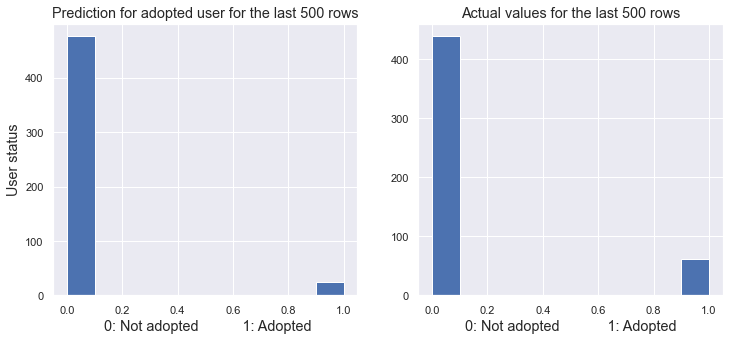

In [230]:
y_prediction=reg_model.predict(X_ML)
y_prediction=y_prediction.round()
fig,ax= plt.subplots(1,2, figsize=(12,5))
ax[0].set_title('Prediction for adopted user for the last 500 rows', size='large')
ax[1].set_title('Actual values for the last 500 rows', size='large')
ax[0].set_xlabel(' 0: Not adopted           1: Adopted', size='large')
ax[1].set_xlabel('0: Not adopted            1: Adopted', size='large')
ax[0].hist(y_prediction)
ax[1].hist(y_ML)
ax[0].set_ylabel('User status', size='large')
plt.show()

In [234]:
#AdaBoostClassifier model
for i in [10, 100, 200, 250, 300]:
    model=AdaBoostClassifier(n_estimators=i)
    model.fit(X_train, y_train)
    model.predict(X_test)
    print('n_estimator=',i,' Score=', model.score(X_test, y_test))

n_estimator= 10  Score= 0.9657971014492753
n_estimator= 100  Score= 0.9715942028985507
n_estimator= 200  Score= 0.9733333333333334
n_estimator= 250  Score= 0.9721739130434782
n_estimator= 300  Score= 0.9727536231884057


So n_estimator=200 is the best case

In [242]:
#Prediction and performance evaluation
model=AdaBoostClassifier(n_estimators=200)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3000   27]
 [  65  358]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3027
           1       0.93      0.85      0.89       423

    accuracy                           0.97      3450
   macro avg       0.95      0.92      0.94      3450
weighted avg       0.97      0.97      0.97      3450



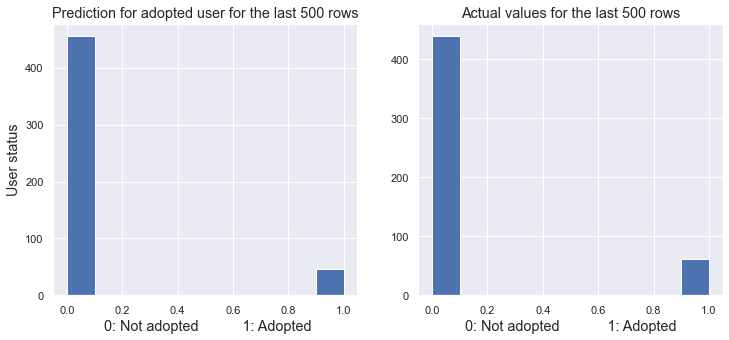

In [236]:
y_prediction=model.predict(X_ML)
y_prediction=y_prediction.round()
fig,ax= plt.subplots(1,2, figsize=(12,5))
ax[0].set_title('Prediction for adopted user for the last 500 rows', size='large')
ax[1].set_title('Actual values for the last 500 rows', size='large')
ax[0].set_xlabel(' 0: Not adopted           1: Adopted', size='large')
ax[1].set_xlabel('0: Not adopted            1: Adopted', size='large')
ax[0].hist(y_prediction)
ax[1].hist(y_ML)
ax[0].set_ylabel('User status', size='large')
plt.show()

In [237]:
model.feature_importances_

array([0.045, 0.52 , 0.005, 0.   , 0.045, 0.03 , 0.225, 0.11 , 0.02 ,
       0.   , 0.   , 0.   , 0.   , 0.   ])

In [240]:
important_features=df2[df2['object_id']<11500].drop('Adopted_user', axis=1)
important_features.columns

Index(['object_id', 'last_session_creation_timex10^9',
       'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id',
       'invited_by_user_id', 'year', 'month', 'day', 'C_GUEST_INVITE',
       'C_ORG_INVITE', 'C_PERSONAL_PROJECTS', 'C_SIGNUP',
       'C_SIGNUP_GOOGLE_AUTH'],
      dtype='object')

### So the important features to improve the number of adopted users are year, last_session_creation_timex10^9 and month